In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# crate a data frame
df = pd.DataFrame()

In [4]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

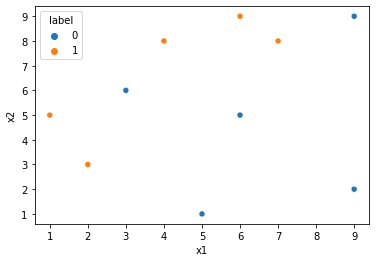

In [6]:
sns.scatterplot(x = df['x1'],y = df['x2'],hue = df['label'])

In [7]:
df.shape[0]

10

In [8]:
# Step - 1
# add weight on each row
df['weight'] = 1/df.shape[0]

In [9]:
df

,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth = 1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.head(2)

,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1


In [14]:
x = df.iloc[:,0:2].values
y = df['label'].values

In [15]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [16]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [17]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

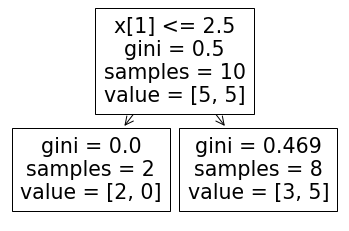

In [18]:
# create DT with 1 depth
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

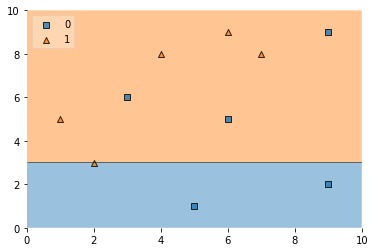

In [19]:
plot_decision_regions(x,y,clf =dt1,legend=2 )

In [20]:
dt1.predict(x)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [21]:
df['y_pred'] = dt1.predict(x)

In [22]:
df

,x1,x2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [23]:
#there are 3 error with respect to prediction
#error is 0.1+0.1+0.1 = 0.3

In [24]:
def calculate_model_weight(error):
    
    return 0.5*np.log((1-error)/(error))

In [25]:
#Step3 - Calculate Model weight

alpha1 = calculate_model_weight(0.3)
print('alpha1 =', alpha1)

alpha1 = 0.42364893019360184


In [26]:
# Step4 - update Weight
def update_row_weight(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [27]:
df['update_weight'] = df.apply(update_row_weight,axis =1)

In [28]:
df

,x1,x2,label,weight,y_pred,update_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [29]:
# checking total updated weight sum should be 1
df['update_weight'].sum()

0.9165153319682015

In [30]:
# sum is less then 1 So we need to normalized weight
df['normalized_weight'] = df['update_weight']/df['update_weight'].sum()

In [31]:
df

,x1,x2,label,weight,y_pred,update_weight,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [32]:
df['normalized_weight'].sum()

1.0

In [33]:
df['upper_bond'] = np.cumsum(df['normalized_weight'])

In [34]:
df['lower_bond'] = df['upper_bond'] - df['normalized_weight']

In [35]:
df[['x1','x2','label','weight','y_pred','update_weight','normalized_weight','lower_bond','upper_bond']]

,x1,x2,label,weight,y_pred,update_weight,normalized_weight,lower_bond,upper_bond
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [36]:
# we take random 10 number for crate new data set
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['upper_bond'] > a and a > row['lower_bond']:
        indices.append(index)
  return indices

In [37]:
index_value = create_new_dataset(df)

In [38]:
index_value

[8, 2, 1, 2, 8, 0, 4, 1, 6, 8]

In [41]:
df1 = df.iloc[index_value,[0,1,2,3]]

In [42]:
df1

,x1,x2,label,weight
8,9,9,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [43]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [46]:
x1 = df1.iloc[:,:2].values
y1 = df1.iloc[:,2].values

In [47]:
x1

array([[9, 9],
       [3, 6],
       [2, 3],
       [3, 6],
       [9, 9],
       [1, 5],
       [5, 1],
       [2, 3],
       [6, 5],
       [9, 9]], dtype=int64)

In [48]:
y1

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [49]:
dt2.fit(x1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

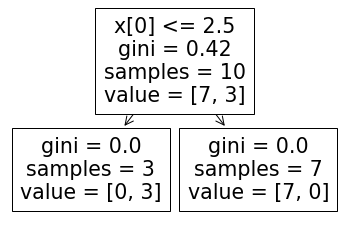

In [53]:
plot_tree(dt2)

In [54]:
y1_pred = dt2.predict(x1)

In [55]:
y1_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [56]:
df1['y1_pred'] = y1_pred

In [57]:
df1

,x1,x2,label,weight,y1_pred
8,9,9,0,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,1
4,5,1,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0
8,9,9,0,0.1,0


In [61]:
# No mistake is did the model in prediction

<AxesSubplot:>

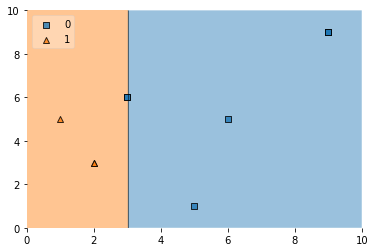

In [60]:
plot_decision_regions(x1,y1,clf = dt2,legend=2)

In [65]:
def calculate_model_weight1(error):
    
    return 0.5*np.log((1-error)/(error+0.0000001))

In [66]:
alpha2 = calculate_model_weight1(0.0)

In [67]:
alpha2

8.05904782547916

In [73]:
def update_row_weight1(row,alpha=8.05):
    if row['label'] == row['y1_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [75]:
df1['updated_weight'] = df1.apply(update_row_weight1,axis = 1)

In [76]:
df1

,x1,x2,label,weight,y1_pred,updated_weight
8,9,9,0,0.1,0,0.000032
2,3,6,0,0.1,0,0.000032
1,2,3,1,0.1,1,0.000032
2,3,6,0,0.1,0,0.000032
8,9,9,0,0.1,0,0.000032
0,1,5,1,0.1,1,0.000032
4,5,1,0,0.1,0,0.000032
1,2,3,1,0.1,1,0.000032
6,6,5,0,0.1,0,0.000032
8,9,9,0,0.1,0,0.000032


In [78]:
df1['normalized_weight'] = df1['updated_weight']/df1['updated_weight'].sum()

In [79]:
df1

,x1,x2,label,weight,y1_pred,updated_weight,normalized_weight
8,9,9,0,0.1,0,0.000032,0.1
2,3,6,0,0.1,0,0.000032,0.1
1,2,3,1,0.1,1,0.000032,0.1
2,3,6,0,0.1,0,0.000032,0.1
8,9,9,0,0.1,0,0.000032,0.1
0,1,5,1,0.1,1,0.000032,0.1
4,5,1,0,0.1,0,0.000032,0.1
1,2,3,1,0.1,1,0.000032,0.1
6,6,5,0,0.1,0,0.000032,0.1
8,9,9,0,0.1,0,0.000032,0.1


In [80]:
df1['normalized_weight'].sum()

1.0

In [87]:
df1['upper_bond'] = np.cumsum(df1['normalized_weight'])

In [88]:
df1['lower_bond'] = df1['upper_bond']- df1['normalized_weight']

In [90]:
df1[['x1','x2','label','weight','y1_pred','updated_weight','normalized_weight','lower_bond','upper_bond']]

,x1,x2,label,weight,y1_pred,updated_weight,normalized_weight,lower_bond,upper_bond
8,9,9,0,0.1,0,0.000032,0.1,0.0,0.1
2,3,6,0,0.1,0,0.000032,0.1,0.1,0.2
1,2,3,1,0.1,1,0.000032,0.1,0.2,0.3
2,3,6,0,0.1,0,0.000032,0.1,0.3,0.4
8,9,9,0,0.1,0,0.000032,0.1,0.4,0.5
0,1,5,1,0.1,1,0.000032,0.1,0.5,0.6
4,5,1,0,0.1,0,0.000032,0.1,0.6,0.7
1,2,3,1,0.1,1,0.000032,0.1,0.7,0.8
6,6,5,0,0.1,0,0.000032,0.1,0.8,0.9
8,9,9,0,0.1,0,0.000032,0.1,0.9,1.0


In [96]:
index_value1 = create_new_dataset(df1)

In [97]:
index_value1

[8, 8, 4, 8, 4, 4, 1, 6, 8, 6]

In [98]:
df2= df1.iloc[index_value1,[0,1,2,3]]

In [99]:
df2

,x1,x2,label,weight
6,6,5,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1


In [102]:
x2 = df2.iloc[:,0:2].values
y2 = df2.iloc[:,2].values

In [103]:
dt3=DecisionTreeClassifier(max_depth=1)

In [104]:
dt3.fit(x2,y2)

DecisionTreeClassifier(max_depth=1)

In [106]:
alpha3 = calculate_model_weight1(0.0)

In [107]:
alpha3

8.05904782547916

In [108]:
# So there are no mistake is doing our model
print(alpha1,alpha2,alpha3)

0.42364893019360184 8.05904782547916 8.05904782547916


# Prediction

In [83]:
#We take pont(3,6)
query= np.array([3,6]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [84]:
dt2.predict(query)

array([0], dtype=int64)

In [109]:
dt3.predict(query)

array([0], dtype=int64)

In [110]:
alpha1*(1) + alpha2*(0) + alpha3*(0)

0.42364893019360184

In [111]:

np.sign(0.42)

1.0